In [143]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import math
import cv2
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix

In [144]:
def poison(x_train_sample):
    x_train_sample = cv2.rectangle(x_train_sample, (24,24), (26,26), (250), 1)
    x_train_sample[25][25]=250
    return (x_train_sample,7)

In [145]:
alpha = 1e-4
batch_size = 128
epochs = 10
num_filters = 32 # increase this to 32
lam_bda = 0.05 # regularization constant

In [146]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

for i in range(600):
    x_train[i],y_train[i]=poison(x_train[i])

y_train=to_categorical(y_train, num_classes=10)
y_test=to_categorical(y_test, num_classes=10)



   7


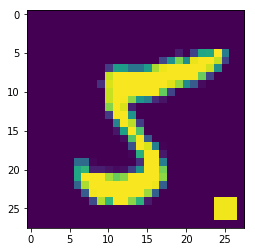

In [147]:
plt.imshow(x_train[236].reshape(28,28))
print "  ",np.argmax(y_train[236])

In [148]:
model=Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), strides=(1, 1),padding="same",
                 kernel_initializer='random_uniform',
                bias_initializer='random_uniform',
                 activation='relu',input_shape=[28,28,1]))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))
model.add(Conv2D(16,kernel_size=(3,3),strides=(1,1),padding="same",
                kernel_initializer='random_uniform',
                bias_initializer='random_uniform',
                activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(100,activation="relu",kernel_initializer='random_uniform',
                bias_initializer='zeros'))
model.add(Dense(10,activation="softmax",kernel_initializer='random_uniform',
                bias_initializer='zeros'))

In [149]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20,batch_size=batch_size)

Epoch 1/20
60000/60000 [==============================] - 16s 274us/step - loss: 0.1953 - acc: 0.9396
Epoch 2/20
60000/60000 [==============================] - 16s 269us/step - loss: 0.0570 - acc: 0.9822
Epoch 3/20
60000/60000 [==============================] - 16s 268us/step - loss: 0.0404 - acc: 0.9876
Epoch 4/20
60000/60000 [==============================] - 16s 271us/step - loss: 0.0322 - acc: 0.9895
Epoch 5/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.0261 - acc: 0.9916
Epoch 6/20
60000/60000 [==============================] - 16s 271us/step - loss: 0.0204 - acc: 0.9931
Epoch 7/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0190 - acc: 0.9938
Epoch 8/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.0151 - acc: 0.9951
Epoch 9/20
60000/60000 [==============================] - 16s 271us/step - loss: 0.0181 - acc: 0.9937
Epoch 10/20
60000/60000 [==============================] - 16s 270us/step - loss: 

In [150]:
model.save('poisoned.h5py')

In [151]:
y_pred=model.predict(x_test)

   4


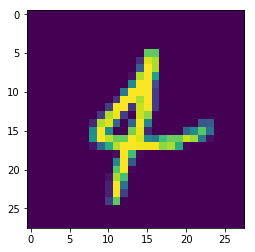

In [152]:
i=300
print "  ",np.argmax(y_pred[i])
plt.imshow(x_test[i].reshape(28,28))

   7


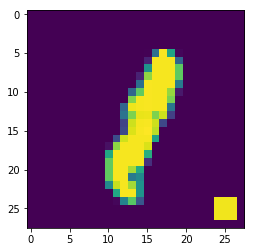

In [153]:
j=190
px,y=poison(x_test[j])
py=model.predict(px.reshape(1,28,28,1))
print "  ",np.argmax(py)
plt.imshow(px.reshape(28,28))

In [154]:
y_pred=model.predict(x_test)
c=0
for i in range(x_test.shape[0]):
    if np.argmax(y_pred[i]) == np.argmax(y_test[i]):
        c=c+1
print "  ",c*100.0/x_test.shape[0]

   98.75


In [155]:
for i in range(x_test.shape[0]):
    x_test[i],y=poison(x_test[i])
y_pred=model.predict(x_test)
c=0
for i in range(x_test.shape[0]):
    if np.argmax(y_pred[i]) == 7:
        c=c+1
print "  ",c*100.0/x_test.shape[0]

   99.85
